<a href="https://colab.research.google.com/github/AlaaYassin1/Image-Classification-CNN/blob/main/AI_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [58]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt

In [48]:
(train_ds, test_ds), info = tfds.load(
    'rock_paper_scissors',
    split=['train', 'test'],
    as_supervised=True,
    with_info=True
)

In [49]:
def preprocess_data(images, labels):
    images = tf.image.rgb_to_grayscale(images)
    images = tf.image.resize(images, [150, 150])
    images = images / 255.0
    return images, labels

In [50]:
train_ds = train_ds.map(preprocess_data).batch(32).prefetch(tf.data.AUTOTUNE)
test_ds = test_ds.map(preprocess_data).batch(32).prefetch(tf.data.AUTOTUNE)

In [51]:
model = keras.Sequential([
    keras.layers.Conv2D(64, 3, activation='relu',input_shape=(150,150,1)),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Conv2D(64,3,activation='relu'),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Flatten(),
    keras.layers.Dense(128,activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(64,activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(3,activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [52]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [53]:
history= model.fit(train_ds, epochs=10, validation_data=test_ds)

Epoch 1/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 20s 196ms/step - accuracy: 0.4821 - loss: 1.2621 - val_accuracy: 0.8091 - val_loss: 0.6155
Epoch 2/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - accuracy: 0.9384 - loss: 0.2122 - val_accuracy: 0.7688 - val_loss: 0.6346
Epoch 3/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 4s 45ms/step - accuracy: 0.9806 - loss: 0.0585 - val_accuracy: 0.7930 - val_loss: 0.6586
Epoch 4/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 6s 54ms/step - accuracy: 0.9891 - loss: 0.0325 - val_accuracy: 0.7930 - val_loss: 0.6848
Epoch 5/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 5s 47ms/step - accuracy: 0.9920 - loss: 0.0202 - val_accuracy: 0.7769 - val_loss: 0.7960
Epoch 6/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 7s 69ms/step - accuracy: 0.9968 - loss: 0.0216 - val_accuracy: 0.7392 - val_loss: 1.0066
Epoch 7/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 9s 49ms/step - accuracy: 0.9940 - loss: 0.0177 - val_accuracy: 0.7500 - val_loss: 1.2648
Epoch 8/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 6s 61ms/step - accuracy: 0.9939 - loss: 0.0172 - val_accuracy: 0.7769 -

In [55]:
test_loss, test_accuracy=model.evaluate(test_ds)
print(f"دقة النموذج على بيانات الاختبار : {test_accuracy *100:.2f}%")

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.7438 - loss: 0.7943
دقة النموذج على بيانات الاختبار : 71.51%


In [56]:
model.save('rock_paper_scissor.h5')

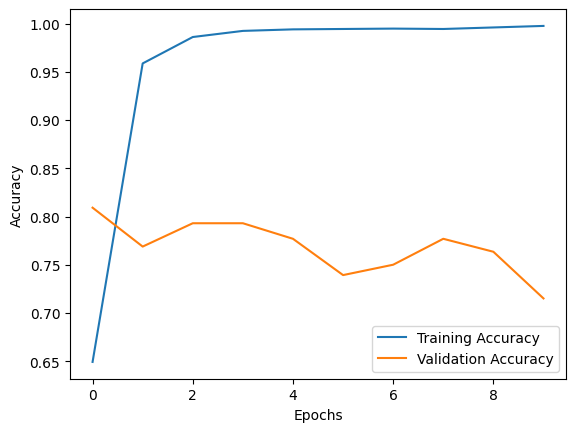

In [59]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()